In [ ]:
import sys
import os
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Currently: /Users/.../ML-Project1/LassoHomotopy/notebook
# Going two levels up => /Users/.../ML-Project1
project_root = os.path.abspath("../../")

if project_root not in sys.path:
    sys.path.append(project_root)

from LassoHomotopy.model import LassoHomotopyModel


In [14]:
csv_file_root=os.path.abspath("../../")
csv_file=csv_file_root+"/regression_data.csv"
df = pd.read_csv(csv_file)

# Preview the first few rows
print("First 5 rows of regression_data:")
display(df.head())

First 5 rows of regression_data:


,x_0,x_1,y
0,7.739560,4.388784,33.709807
1,8.585979,6.973680,43.053539
2,0.941773,9.756224,36.151705
3,7.611397,7.860643,43.788379
4,1.281136,4.503859,21.107608


In [15]:
feature_cols = [col for col in df.columns if col.startswith("x_")]
X = df[feature_cols].values
y = df["y"].values

# Instantiate and fit the model (alpha=0.0 => OLS; or pick another alpha if you want regularization)
model = LassoHomotopyModel(alpha=0.0, max_iter=5000, tol=1e-5)
results = model.fit(X, y)

# Predictions on the same dataset
preds = results.predict(X)

# Print out the learned parameters
print("\n=== Model Results ===")
print("Learned coefficients:", results.coef_)
print("Learned intercept:", results.intercept_)

# Compute mean absolute error (MAE) and mean squared error (MSE)
mae = np.mean(np.abs(preds - y))
mse = np.mean((preds - y) ** 2)
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

DEBUG: alpha=0.0, max_iter=5000, tol=1e-05

=== Model Results ===
Learned coefficients: [2.00051842 3.00445973]
Learned intercept: 4.969827915375774
MAE: 0.0759
MSE: 0.0100


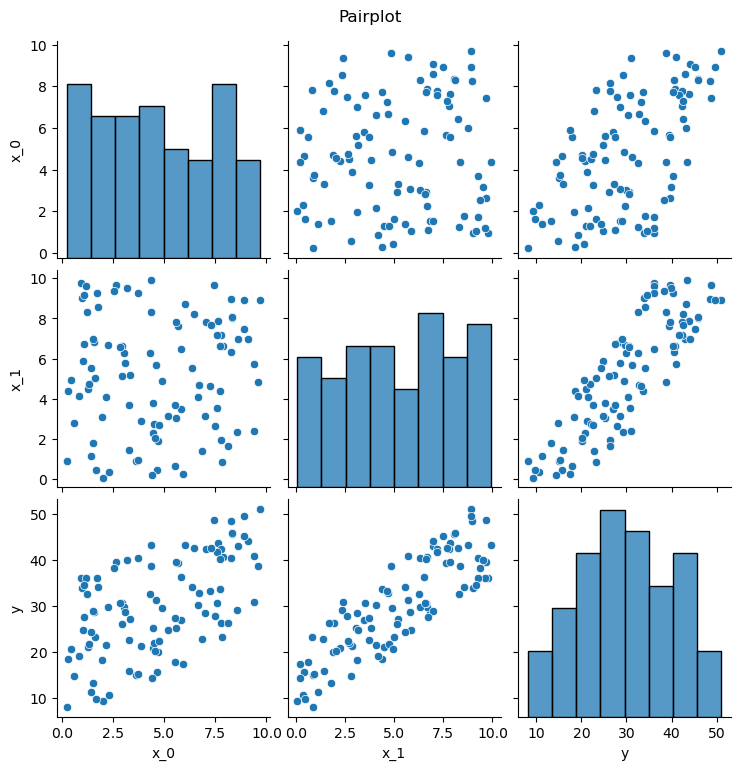

In [18]:
sns.pairplot(df)
plt.suptitle("Pairplot", y=1.02)
plt.show()

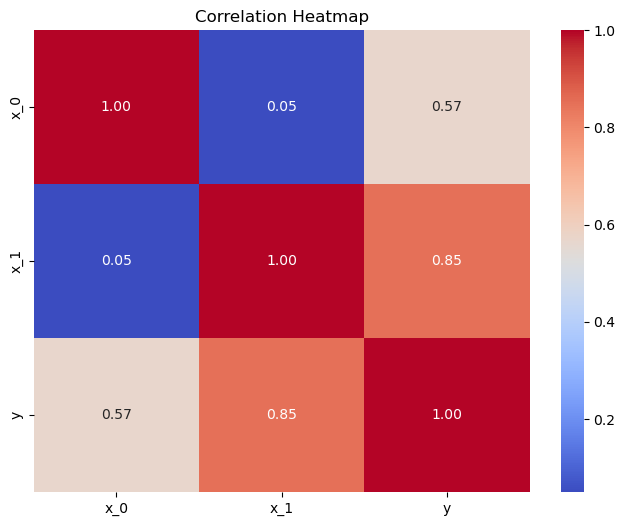

In [20]:
corr_matrix = df.corr()

# Plot the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()